In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Part 1: EDA
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.isna().sum()

login_time    0
dtype: int64

In [8]:
df['15min_interval'] = df['login_time'].dt.floor('15min')
df['15min_interval'].value_counts().head()

15min_interval
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-04 05:00:00    60
Name: count, dtype: int64

In [10]:
df.dtypes

login_time        datetime64[ns]
15min_interval    datetime64[ns]
dtype: object

In [12]:
df.describe()

,login_time,15min_interval
count,93142,93142
mean,1970-02-26 19:09:39.779648278,1970-02-26 19:02:09.653647119
min,1970-01-01 20:12:16,1970-01-01 20:00:00
25%,1970-02-04 10:37:19.750000,1970-02-04 10:30:00
50%,1970-03-01 06:33:05.500000,1970-03-01 06:30:00
75%,1970-03-22 04:01:10.750000,1970-03-22 04:00:00
max,1970-04-13 18:57:38,1970-04-13 18:45:00


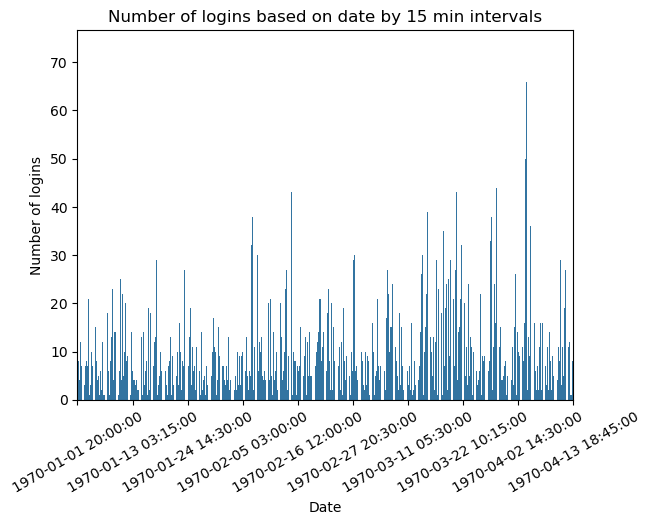

In [25]:
_plot = sns.countplot(x = '15min_interval', data = df)
_plot.xaxis.set_major_locator(ticker.LinearLocator(10))
_plot.set_title('Number of logins based on date by 15 min intervals')
_plot.set_xlabel('Date')
_plot.set_ylabel('Number of logins');
plt.xticks(rotation=30);

In [32]:
df['15min'] = df['15min_interval'].dt.strftime('%H%M')
df.head()

,login_time,15min_interval,day_of_week,hour,15min
0,1970-01-01 20:13:18,1970-01-01 20:00:00,Thursday,20,2000
1,1970-01-01 20:16:10,1970-01-01 20:15:00,Thursday,20,2015
2,1970-01-01 20:16:37,1970-01-01 20:15:00,Thursday,20,2015
3,1970-01-01 20:16:36,1970-01-01 20:15:00,Thursday,20,2015
4,1970-01-01 20:26:21,1970-01-01 20:15:00,Thursday,20,2015


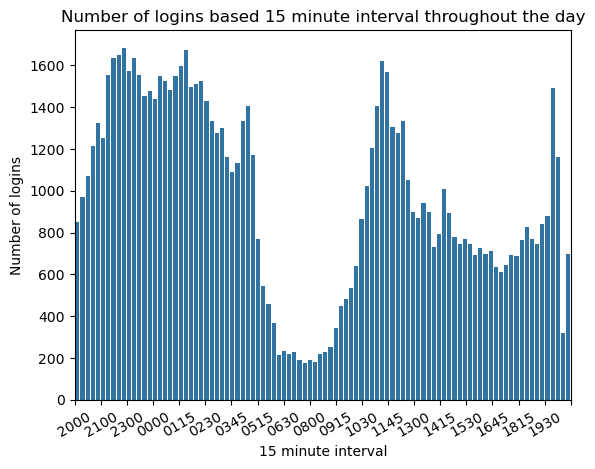

In [36]:
_plot = sns.countplot(x='15min', data=df)
_plot.set_title('Number of logins based 15 minute interval throughout the day')
_plot.set_xlabel('15 minute interval')
_plot.set_ylabel('Number of logins')
_plot.xaxis.set_major_locator(ticker.LinearLocator(20))
plt.xticks(rotation=30);

In [20]:
df['day_of_week'] = df['login_time'].dt.day_name()

In [22]:
df['day_of_week'].value_counts()

day_of_week
Saturday     19377
Sunday       18167
Friday       15208
Thursday     11960
Wednesday    10339
Tuesday       9268
Monday        8823
Name: count, dtype: int64

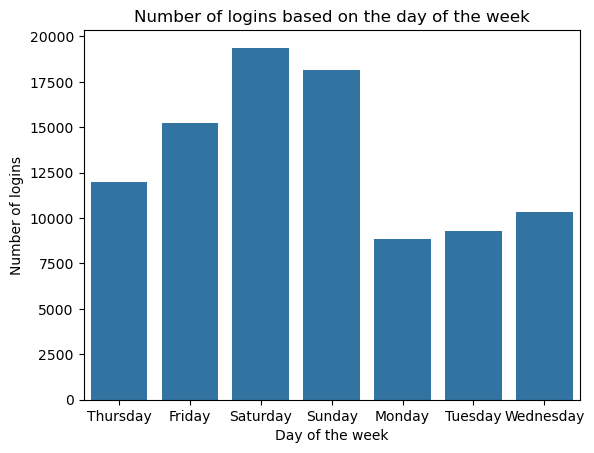

In [24]:
_plot = sns.countplot(x='day_of_week', data=df)
_plot.set_title('Number of logins based on the day of the week')
_plot.set_xlabel('Day of the week')
_plot.set_ylabel('Number of logins');

In [27]:
df['hour'] = df['login_time'].dt.hour
df.head()

,login_time,15min_interval,day_of_week,hour
0,1970-01-01 20:13:18,1970-01-01 20:00:00,Thursday,20
1,1970-01-01 20:16:10,1970-01-01 20:15:00,Thursday,20
2,1970-01-01 20:16:37,1970-01-01 20:15:00,Thursday,20
3,1970-01-01 20:16:36,1970-01-01 20:15:00,Thursday,20
4,1970-01-01 20:26:21,1970-01-01 20:15:00,Thursday,20


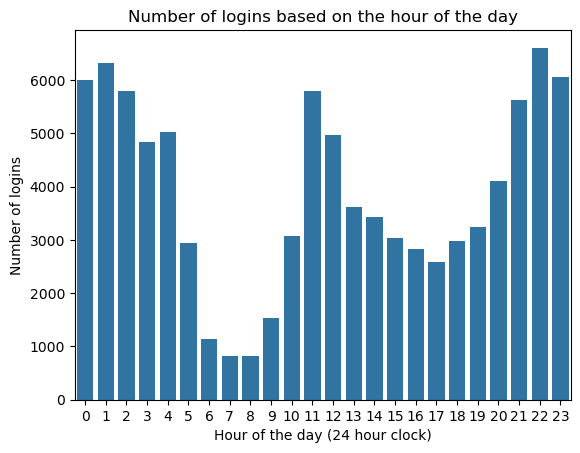

In [28]:
_plot = sns.countplot(x='hour', data=df)
_plot.set_title('Number of logins based on the hour of the day')
_plot.set_xlabel('Hour of the day (24 hour clock)')
_plot.set_ylabel('Number of logins');

## Findings: 

1. There are a few issues with data integrity, namely the logins are all from 1970, which suggests data was collected and the 'epoch' timestamp was used. That makes me suspicious of the month and day of these dates; however, with so many data points I feel more confident 
in assessing the hour of the day the logins were made, and slightly confident the day of the week (Sunday, Monday, etc).
2. Three different charts illustrate cycles in logins:
   - Hour of the day countplot shows that there is a significant dip in logins between the hours of 6 am and 9am, and there are the most logins ranging between 22:00 and 02:00, with one other spike mid-morning, around 11:00.
   - The findings of the 15-minute interval chart corroborate these findings at a finer scale, showing the late-night and mid-morning spikes.
   - The day-of-the-week chart shows that the most logins occured on the weekend, and the least on Mondays. This chart shows a definitive pattern of logins depending on what day of the week it is; however, this data could be shifted due to the suspicious nature of the login datetime provided (see not on data integrity above). That said, empirically it would make sense that more logins / rides occured on the weekend, and fewer on the Monday (possibly recovering from a weekend out, or a trip away). 